In [1]:
from typing import Optional
from typing import Iterable
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit, logit

from catalytic_model.catalytic_model import (
    ForceOfInfectionMethod,
    InitialSusceptibleMethod,
    get_infections_by_year,
    catalytic_model,
    run_optimization,
    get_iteration_list,
    get_params_initial_guess
)

np.set_printoptions(linewidth=1000, threshold=10000, precision=3)
np.random.seed(42)

POPULATION_PER_AGE = 1000
MAX_AGE = 50
NUM_YEARS = 50
GLOBAL_DEFAULT_A1 = 10

In [2]:
# TODO:
# - fix the thing about the subset of years to use for the loss function
# - add a function to plot the results in an 8 by 6 grid

# Catalytic Model:
## Combination of work from class and extending the model for HW 1

## HW 2 Main Section

In [3]:
default_y_unobserved_years = 10

curr_foi_method = ForceOfInfectionMethod.AGE_PIECEWISE
curr_num_years = 60
curr_init_susc_method = InitialSusceptibleMethod.INDIRECT

In [4]:
# rho_observed_infections = 0.25

# age_piecewise_gt = catalytic_model(
#     model_params=np.array([np.log(0.3), np.log(0.05), logit(GLOBAL_DEFAULT_A1/MAX_AGE), np.log(default_y_unobserved_years)]),
#     force_of_infection_method=ForceOfInfectionMethod.AGE_PIECEWISE,
#     initial_susceptible_method=InitialSusceptibleMethod.INDIRECT,
#     num_years=curr_num_years,
#     include_births=True,
#     deterministic=True,
#     rho_observed_infections=rho_observed_infections
# )
# age_log_lin_gt = catalytic_model(
#     model_params=np.array([-1, -.1, np.log(default_y_unobserved_years)]),
#     force_of_infection_method=ForceOfInfectionMethod.AGE_LOG_LIN,
#     initial_susceptible_method=InitialSusceptibleMethod.INDIRECT,
#     num_years=curr_num_years,
#     include_births=True,
#     deterministic=True,
#     rho_observed_infections=rho_observed_infections
# )

In [5]:
# plt.plot(get_infections_by_year(age_piecewise_gt, num_years=curr_num_years), label="FOI of the Piecewise Form")
# plt.plot(get_infections_by_year(age_log_lin_gt, num_years=curr_num_years), label="FOI of the Log Linear Form")
# plt.axhline(1000, color="black", linestyle="--")
# plt.ylabel("Total Infections")
# plt.xlabel("Year of Study")
# plt.legend()
# plt.show()

In [6]:
# # encode the information for our guesses
# direct_init_susc = np.insert(np.ones(MAX_AGE - 1)*np.log(900), 0, np.log(POPULATION_PER_AGE))
# # params = np.array([np.log(0.3), np.log(0.05), logit(GLOBAL_DEFAULT_A1/MAX_AGE), np.log(default_y_unobserved_years)])
# params = np.array([np.log(0.1), np.log(0.1), logit(5/MAX_AGE), np.log(5)])
# # params = np.array([-1, -.1, np.log(default_y_unobserved_years)])
# # params = np.array([-0.01, -0.001, np.log(5)])
# total_params = np.concat([params, direct_init_susc])

In [7]:
# optim_results = minimize(
#     objective_function,
#     x0=params,
#     # x0=total_params,
#     args=(
#         curr_foi_method,
#         # age_piecewise_gt,
#         age_piecewise_gt,
#         True,  # all age infection error
#         curr_num_years,
#         curr_init_susc_method,
#     ),
#     method="Nelder-Mead",
#     # method="L-BFGS-B",
#     options={"maxiter": 100000},
# )

In [8]:
# predicted_res = catalytic_model(
#     model_params=optim_results.x,
#     force_of_infection_method=curr_foi_method,
#     initial_susceptible_method=curr_init_susc_method,
#     num_years=curr_num_years,
#     include_births=True,
#     deterministic=True,
# )

In [9]:
# plt.plot(get_infections_by_year(age_piecewise_gt, num_years=curr_num_years), label="Ground Truth")
# plt.plot(get_infections_by_year(predicted_res, num_years=curr_num_years), label="Predicted Infections", linestyle='--')
# plt.ylabel("Total Infections")
# plt.xlabel("Year of Study")
# plt.legend()
# plt.show()

In [10]:
# def get_proper_ground_truth(
#     foi_method: ForceOfInfectionMethod,
#     rho_observed_infections: float,
# ) -> np.ndarray:
#     """
#     Get the ground truth based on the force of infection method.

#     :param foi_method: Force of infection method

#     :return: Ground truth
#     """
#     if foi_method == ForceOfInfectionMethod.AGE_PIECEWISE:
#         age_piecewise_gt = catalytic_model(
#             model_params=np.array([np.log(0.3), np.log(0.05), logit(GLOBAL_DEFAULT_A1/MAX_AGE), np.log(default_y_unobserved_years)]),
#             force_of_infection_method=ForceOfInfectionMethod.AGE_PIECEWISE,
#             initial_susceptible_method=InitialSusceptibleMethod.INDIRECT,
#             num_years=curr_num_years,
#             include_births=True,
#             deterministic=True,
#             rho_observed_infections=rho_observed_infections
#         )
#         return age_piecewise_gt
#     elif foi_method == ForceOfInfectionMethod.AGE_LOG_LIN:
#         age_log_lin_gt = catalytic_model(
#             model_params=np.array([-1, -.1, np.log(default_y_unobserved_years)]),
#             force_of_infection_method=ForceOfInfectionMethod.AGE_LOG_LIN,
#             initial_susceptible_method=InitialSusceptibleMethod.INDIRECT,
#             num_years=curr_num_years,
#             include_births=True,
#             deterministic=True,
#             rho_observed_infections=rho_observed_infections
#         )
#         return age_log_lin_gt
#     else:
#         raise ValueError(f"Unknown force of infection method: {foi_method}")

In [11]:
def plot_all_experiments(
    ages: list[int] = [-1, 0, 9, 19, 29, 39],
    rho_observed_infections: float = 1.0,
    save_fig: bool = False,
) -> None:
    """
    Plot all experiments in a grid of subplots.

    :param ages: List of ages to plot
    :param rho_observed_infections: Rho observed infections
    :param save_fig: Whether to save the figure

    :return: None
    """
    # Create subplots
    fig, axes = plt.subplots(8, 6, figsize=(22, 18), sharex=True, sharey=True, dpi=160)
    row_labels = [
        # f"\t\tForce of Inf: {foi}\nSusceptible Init: {init_susc}\n\tYears of Data: {years}".expandtabs(3) 
        f"{foi}\n{init_susc}\n{years}" 
        for foi, init_susc, years in get_iteration_list()
    ]

    age_piecewise_gt = catalytic_model(
        model_params=np.array([np.log(0.3), np.log(0.05), logit(GLOBAL_DEFAULT_A1/MAX_AGE), np.log(default_y_unobserved_years)]),
        force_of_infection_method=ForceOfInfectionMethod.AGE_PIECEWISE,
        initial_susceptible_method=InitialSusceptibleMethod.INDIRECT,
        num_years=60,
        include_births=True,
        deterministic=True,
        rho_observed_infections=rho_observed_infections
    )
    age_log_lin_gt = catalytic_model(
        model_params=np.array([-1, -.1, np.log(default_y_unobserved_years)]),
        force_of_infection_method=ForceOfInfectionMethod.AGE_LOG_LIN,
        initial_susceptible_method=InitialSusceptibleMethod.INDIRECT,
        num_years=60,
        include_births=True,
        deterministic=True,
        rho_observed_infections=rho_observed_infections
    )

    for i, (foi, curr_num_years, init_susc) in enumerate(get_iteration_list()):
        # TODO: Run the optimization or look it up from a previous run
        si_out_gt = age_piecewise_gt if foi == ForceOfInfectionMethod.AGE_PIECEWISE else age_log_lin_gt

        params = get_params_initial_guess(
            foi_method=foi,
            init_susc_method=init_susc,
        )

        si_out_predicted, optim_params, optim_value = run_optimization(
            params=params,
            foi_method=foi,
            si_out_gt=si_out_gt,
            all_age_infection_error=True,
            num_years=curr_num_years,
            init_susc_method=init_susc,
            rho_observed_infections=rho_observed_infections,
        )
        for age, ax in zip(ages, axes[i]):
            if age < 0:
                ax.plot(get_infections_by_year(si_out_gt, num_years=curr_num_years), linewidth=2, c='b')
                ax.plot(get_infections_by_year(si_out_predicted, num_years=curr_num_years), linewidth=2, linestyle='--', c='r')
                title = "Total"
            else:
                infections_starting_at_age_gt = np.diag(si_out_gt[1, :curr_num_years, :], k=age)
                infections_starting_at_age_predicted = np.diag(si_out_predicted[1, :curr_num_years, :], k=age)

                ax.plot(infections_starting_at_age_gt[:-1], linewidth=2, c='b')
                ax.plot(infections_starting_at_age_predicted[:-1], linewidth=2, linestyle='--', c='r')
                title = f"{age + 1} y.o. Cohort"
            if i == 0:
                ax.set_title(title, fontsize=18)
            ax.grid()
            ax.locator_params(axis='x', nbins=7)
            ax.locator_params(axis='y', nbins=5)
            
        axes[i, -1].yaxis.set_label_position('right')
        axes[i, -1].set_ylabel(row_labels[i], rotation=0, labelpad=5, ha='left', position=(1, .75), fontsize=18)

    fig.supylabel("New infections\n", fontsize=18)
    fig.supxlabel("Time in Years", fontsize=18)
    # Adjust layout and show plot
    plt.suptitle("New Infections by Year and Age Cohort", fontsize=28, y=.995)
    plt.tight_layout()
    if save_fig:
        filename = "new_infections_by_year_and_age_cohort"
        if rho_observed_infections < 1.0:
            filename += "_with_rho"
        plt.savefig(f"images/{filename}.png", dpi=160)
    plt.show()

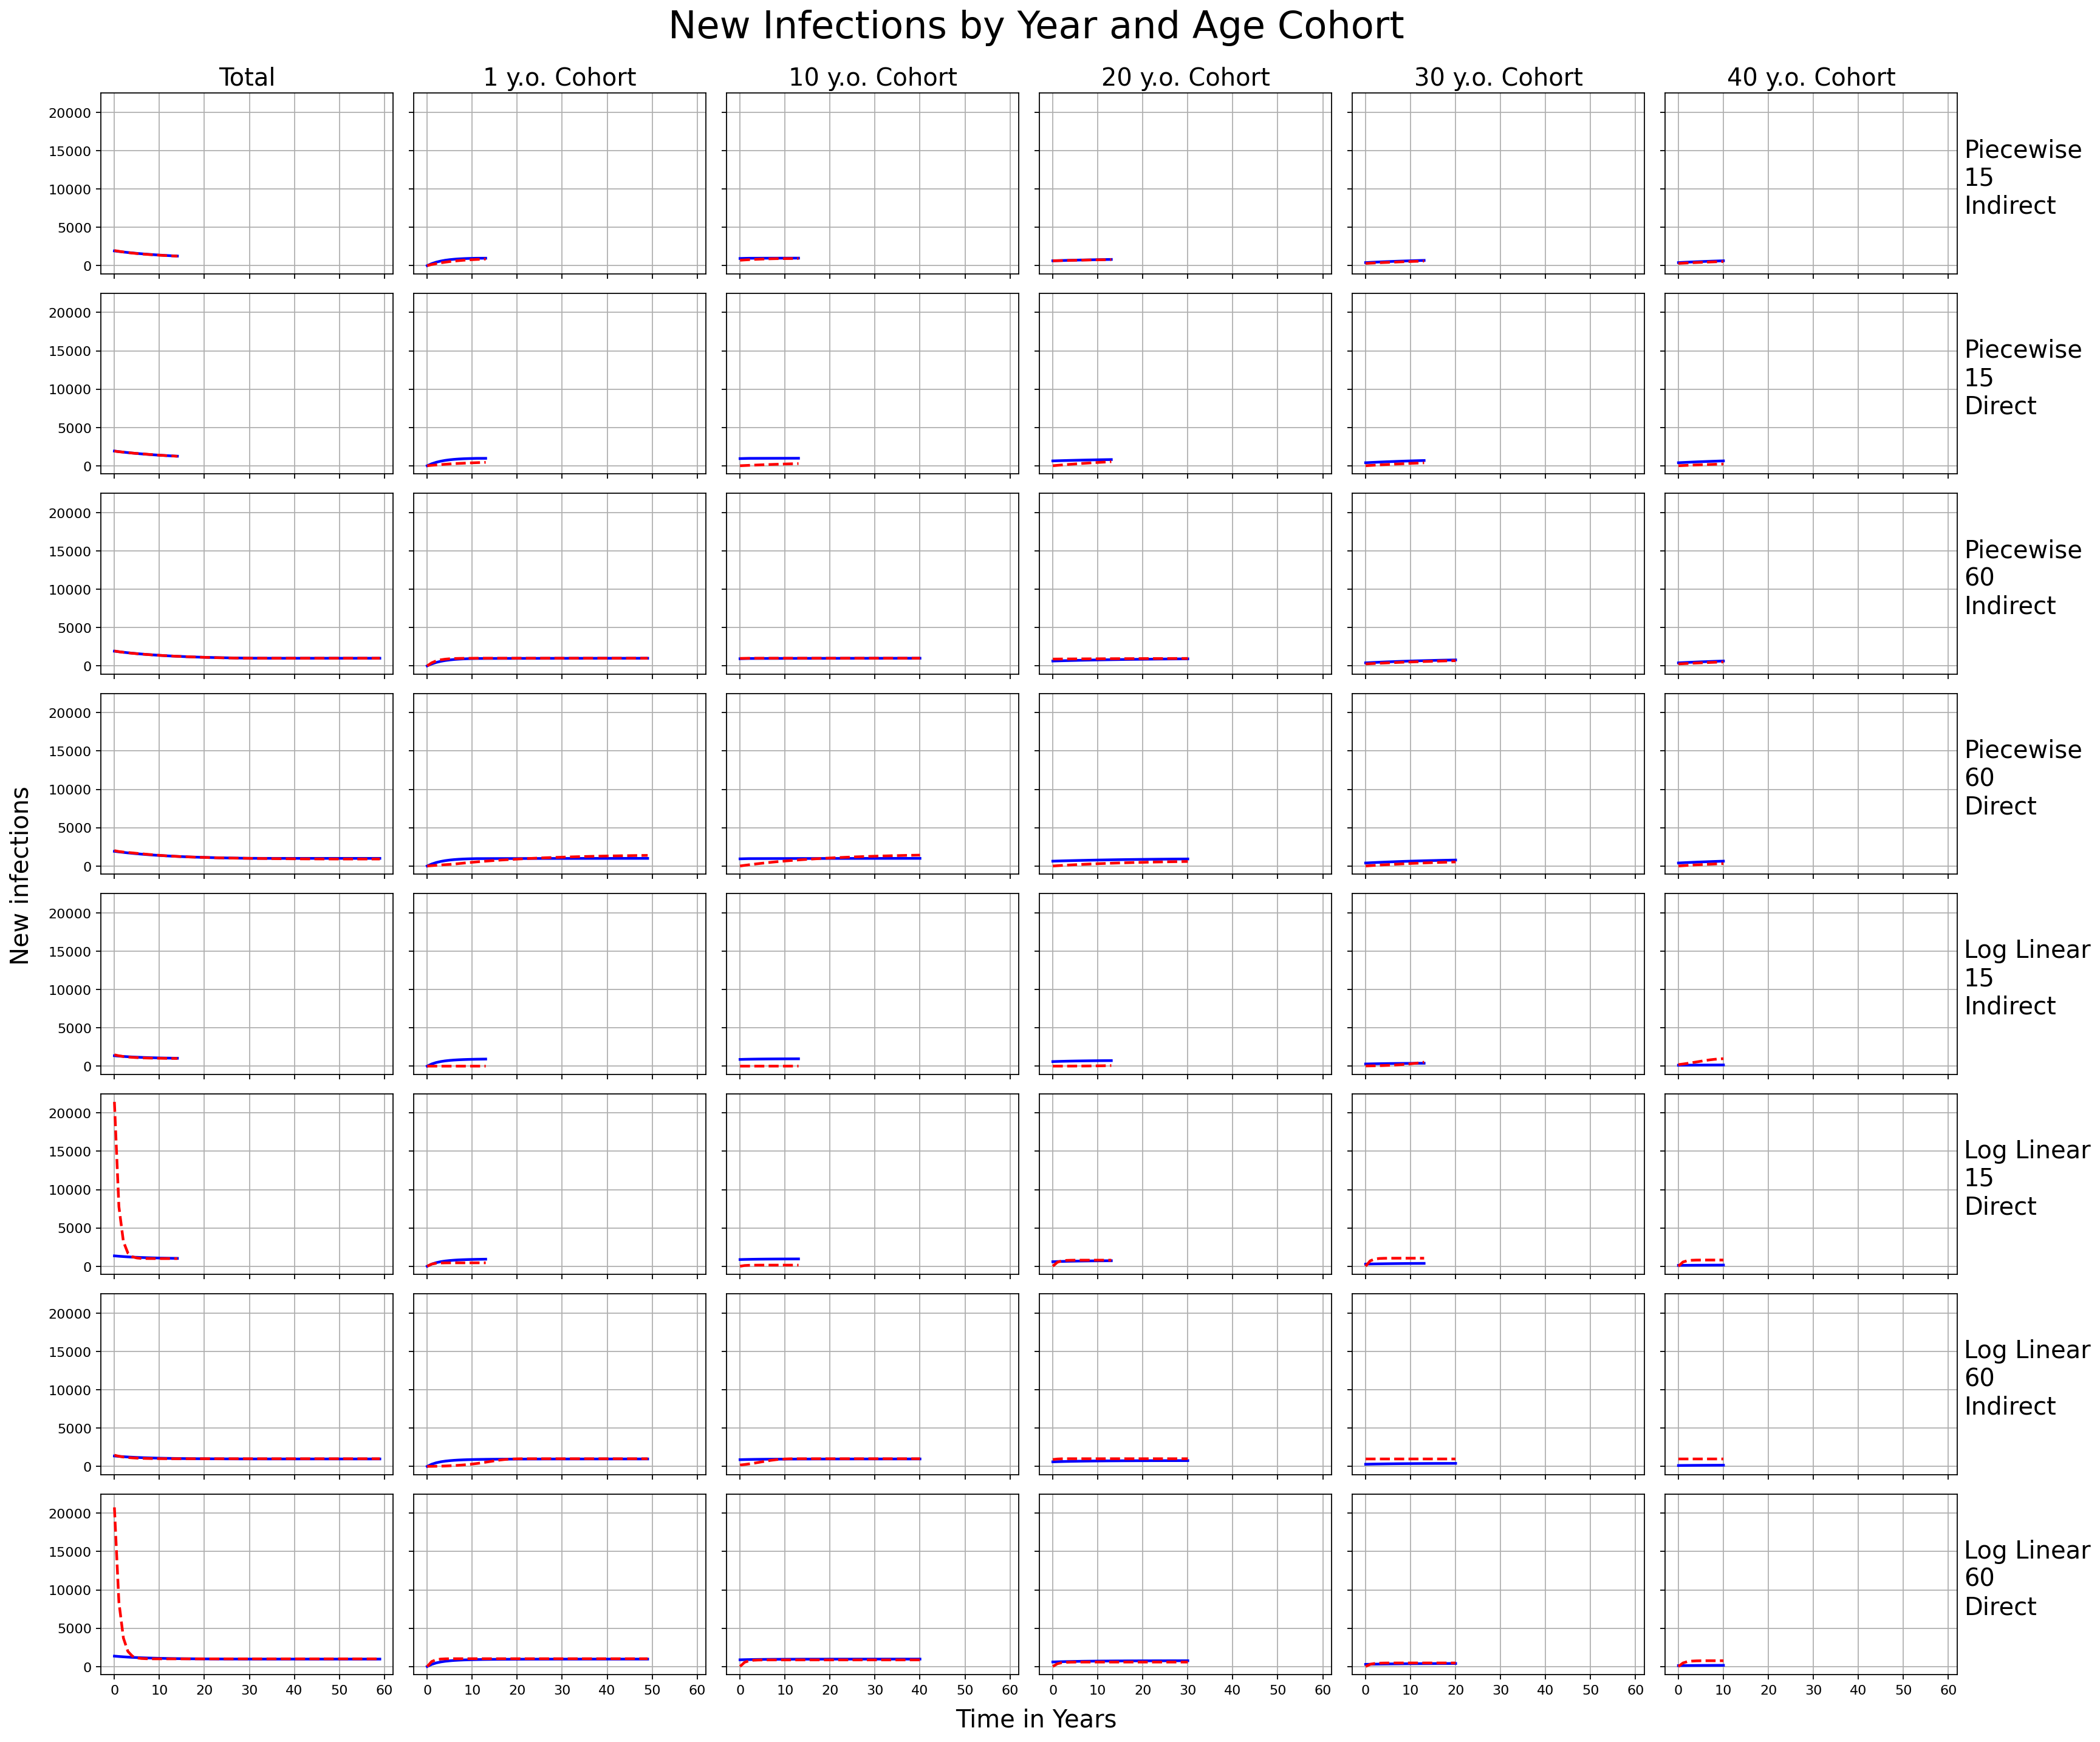

In [12]:
plot_all_experiments(
    ages=[-1, 0, 9, 19, 29, 39],
    save_fig=False,
)

KeyboardInterrupt: 

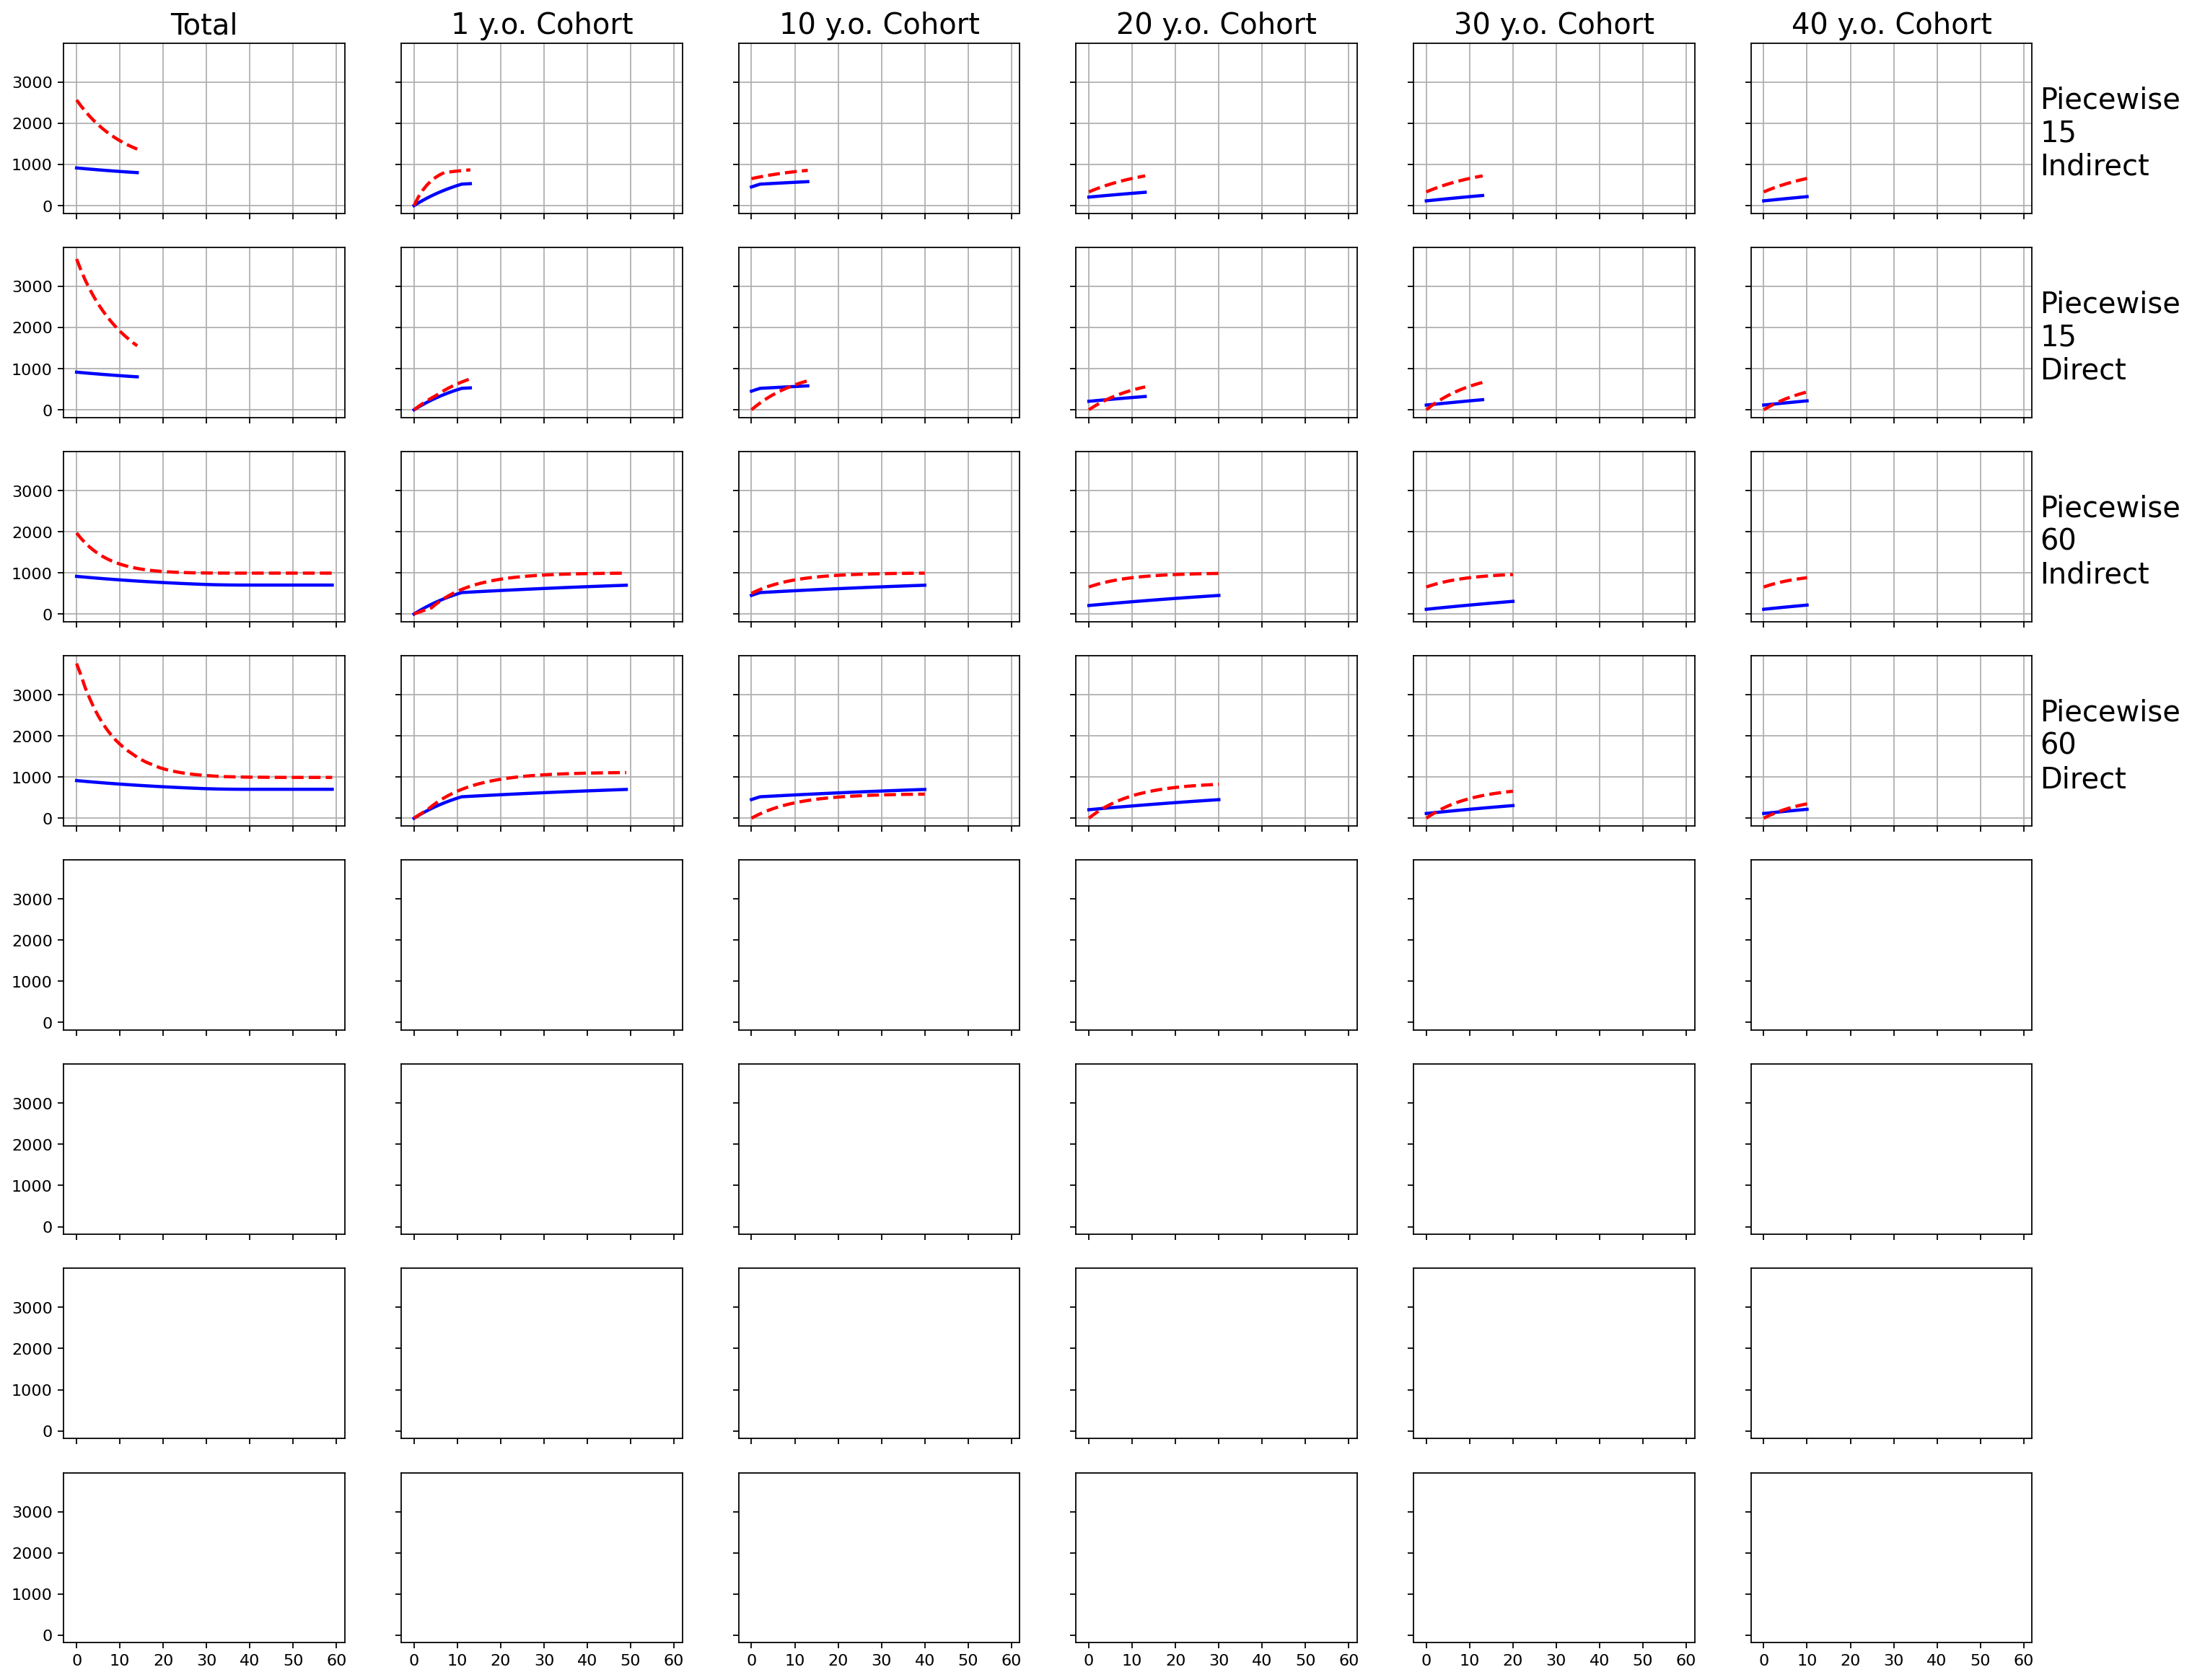

In [13]:
plot_all_experiments(
    ages=[-1, 0, 9, 19, 29, 39],
    rho_observed_infections=0.25,
    save_fig=False,
)